In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Solar+Data+Set.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
train=df.iloc[:8712,1:2].values

In [5]:
test=df.iloc[8712:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Scale the Data
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train)
test_set_scaled = sc.fit_transform(test)

In [8]:
x_train = []
y_train = []
WS = 24

for i in range(WS, len(training_set_scaled)):
  x_train.append(training_set_scaled[i-WS:i, 0:1])
  y_train.append(training_set_scaled[i,0])

#(training_set_scaled[0:24, 0:1])

In [10]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Created three diamention Data and adding features in order to predict the next value

In [ ]:
#DEVELOP THE LSTM MODEL

**LSTM**

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [12]:
Model_P = Sequential()
Model_P.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1],1)))
Model_P.add(Dropout(0.2))
#1input layer
Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))
#hiddenlayer
Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))
#hiddenlayer
Model_P.add(LSTM(units = 60))
Model_P.add(Dropout(0.2))
#output layer
Model_P.add(Dense(units = 1))
Model_P.compile(optimizer='adam',loss='mean_squared_error')

Model_P.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
272/272 [==============================] - 26s 63ms/step - loss: 0.0278
Epoch 2/10
272/272 [==============================] - 17s 62ms/step - loss: 0.0066
Epoch 3/10
272/272 [==============================] - 18s 68ms/step - loss: 0.0043
Epoch 4/10
272/272 [==============================] - 17s 63ms/step - loss: 0.0028
Epoch 5/10
272/272 [==============================] - 25s 91ms/step - loss: 0.0023
Epoch 6/10
272/272 [==============================] - 24s 89ms/step - loss: 0.0020
Epoch 7/10
272/272 [==============================] - 18s 68ms/step - loss: 0.0018
Epoch 8/10
272/272 [==============================] - 28s 105ms/step - loss: 0.0017
Epoch 9/10
272/272 [==============================] - 31s 114ms/step - loss: 0.0018
Epoch 10/10
272/272 [==============================] - 32s 117ms/step - loss: 0.0014


In [15]:
#Save the model
Model_P.save('LSTM_Univariate')


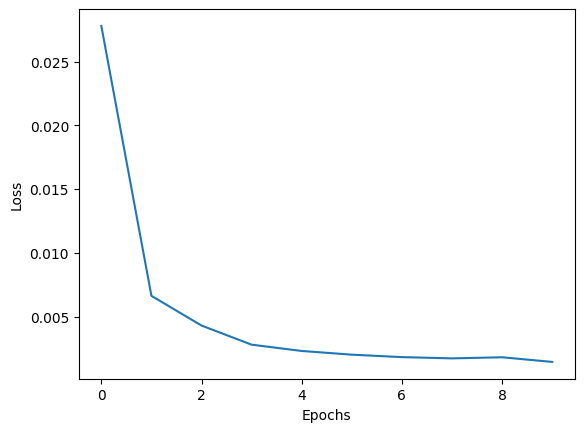

In [16]:
#Plot the Loss
plt.plot(range(len(Model_P.history.history['loss'])), Model_P.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
#To Load the moddel
from keras.models import load_model
Model_P = load_model('LSTM_Univariate')

In [ ]:
#Prediction

In [24]:
#Create an empty list of prediction
pred_list = []
B1 = training_set_scaled[-WS:] #extract the last values and copy it in b1
B2 = B1.reshape((1,WS,1)) #look on the size and reshape it in batch new
#length of pred
for i in range (48):
  Pred1 = Model_P.predict(B2)[0]
  pred_list.append(Pred1)
  B2 = np.append(B2[:,1:,:], [[Pred1]], axis=1)

1/1 [==============================] - 0s 27ms/step


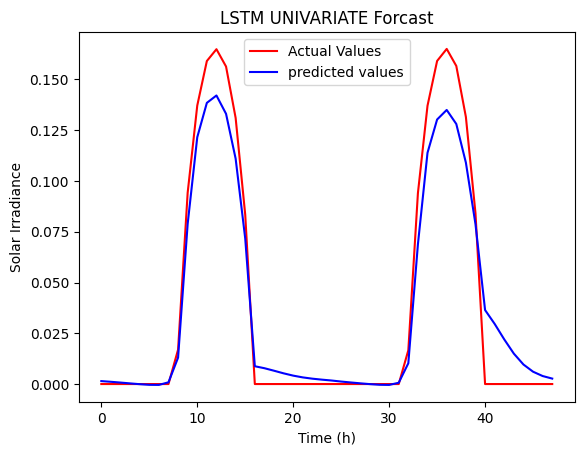

In [28]:
pred_list = np.array(pred_list)
#newformat
predicitions = sc.inverse_transform(pred_list)
#real format of prediction
plt.plot (test, color='red',label='Actual Values')
plt.plot(predicitions, color ='blue', label ='predicted values')
plt.title ('LSTM UNIVARIATE Forcast')
plt.xlabel('Time (h)')
plt.ylabel('Solar Irradiance')
plt.legend()
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(test,predicitions))
from sklearn.metrics import r2_score
Rsquare =r2_score(test,predicitions)

In [35]:
RMSE

0.014536653867837267

In [36]:
Rsquare

0.9449485714657515